<a href="https://colab.research.google.com/github/pingisu/AI4CCEE_Fall_2024/blob/main/in_class_activity/lecture6/Ping_Lecture_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: install PySpark

!pip install pyspark


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=64e3cb2b87a3b2235fa9cbbdd7eea578244261e5c9393465ea3ae025ceab8507
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
# prompt: Create Spark Session

from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("SparkSessionExample").getOrCreate()


In [ ]:
# prompt: Upload wejo.json and load it into rdd

from google.colab import files
uploaded = files.upload()

# Assuming the uploaded file is named 'wejo.json'
rdd = spark.sparkContext.textFile('wejo.json')


KeyboardInterrupt: 

In [ ]:
# prompt: Upload the CSV file (/content/apple_stock.csv)

uploaded = files.upload()


Saving apple_stock.csv to apple_stock (1).csv


In [ ]:
# prompt: Load the CSV File into PySpark and Show the first 20 rows of the DataFrame

import pandas as pd

# Assuming the uploaded file is named 'your_file.csv'
df = spark.read.csv('/content/apple_stock.csv', header=True, inferSchema=True)

df.show(20)


+----------+------------------+------------------+------------------+------------------+---------+------------------+
|      Date|              Open|              High|               Low|             Close|   Volume|         Adj Close|
+----------+------------------+------------------+------------------+------------------+---------+------------------+
|2010-01-04|        213.429998|        214.499996|212.38000099999996|        214.009998|123432400|         27.727039|
|2010-01-05|        214.599998|        215.589994|        213.249994|        214.379993|150476200|27.774976000000002|
|2010-01-06|        214.379993|            215.23|        210.750004|        210.969995|138040000|27.333178000000004|
|2010-01-07|            211.75|        212.000006|        209.050005|            210.58|119282800|          27.28265|
|2010-01-08|        210.299994|        212.000006|209.06000500000002|211.98000499999998|111902700|         27.464034|
|2010-01-11|212.79999700000002|        213.000002|      

In [ ]:
# prompt: Print the schema of the DataFrame

df.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Adj Close: double (nullable = true)



In [ ]:
# prompt: Get the number of rows in the DataFrame

row_count = df.count()
print("Number of rows:", row_count)


Number of rows: 1762


In [ ]:
# prompt: Perform some basic descriptive statistics

# Calculate summary statistics for numerical columns
df.describe().show()

# Calculate the correlation between two columns (e.g., 'Open' and 'Close')
df.stat.corr('Open', 'Close')

# Calculate the frequency of values in a column (e.g., 'Volume')
df.groupBy('Volume').count().show()


+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|summary|              Open|              High|               Low|            Close|             Volume|         Adj Close|
+-------+------------------+------------------+------------------+-----------------+-------------------+------------------+
|  count|              1762|              1762|              1762|             1762|               1762|              1762|
|   mean| 313.0763111589103| 315.9112880164581| 309.8282405079457|312.9270656379113|9.422577587968218E7| 75.00174115607275|
| stddev|185.29946803981522|186.89817686485767|183.38391664371008|185.1471036170943|6.020518776592709E7| 28.57492972179906|
|    min|              90.0|         90.699997|         89.470001|        90.279999|           11475900|         24.881912|
|    max|        702.409988|        705.070023|        699.569977|       702.100021|          470249500|127.96609099999999|
+-------

In [ ]:
# prompt: Select Key columns : ("Date", "Open", "Close", "Volume").

selected_df = df.select("Date", "Open", "Close", "Volume")
selected_df.show()


+----------+------------------+------------------+---------+
|      Date|              Open|             Close|   Volume|
+----------+------------------+------------------+---------+
|2010-01-04|        213.429998|        214.009998|123432400|
|2010-01-05|        214.599998|        214.379993|150476200|
|2010-01-06|        214.379993|        210.969995|138040000|
|2010-01-07|            211.75|            210.58|119282800|
|2010-01-08|        210.299994|211.98000499999998|111902700|
|2010-01-11|212.79999700000002|210.11000299999998|115557400|
|2010-01-12|209.18999499999998|        207.720001|148614900|
|2010-01-13|        207.870005|        210.650002|151473000|
|2010-01-14|210.11000299999998|            209.43|108223500|
|2010-01-15|210.92999500000002|            205.93|148516900|
|2010-01-19|        208.330002|        215.039995|182501900|
|2010-01-20|        214.910006|            211.73|153038200|
|2010-01-21|        212.079994|        208.069996|152038600|
|2010-01-22|206.78000600

In [ ]:
# prompt: Calculate Daily Price Change.

from pyspark.sql.functions import col

# Calculate the daily price change (Close - Open)
daily_change_df = df.withColumn("DailyChange", col("Close") - col("Open"))

# Show the DataFrame with the new column
daily_change_df.select("Date", "Open", "Close", "DailyChange").show()


+----------+------------------+------------------+--------------------+
|      Date|              Open|             Close|         DailyChange|
+----------+------------------+------------------+--------------------+
|2010-01-04|        213.429998|        214.009998|  0.5799999999999841|
|2010-01-05|        214.599998|        214.379993|-0.22000499999998624|
|2010-01-06|        214.379993|        210.969995| -3.4099980000000016|
|2010-01-07|            211.75|            210.58| -1.1699999999999875|
|2010-01-08|        210.299994|211.98000499999998|   1.680010999999979|
|2010-01-11|212.79999700000002|210.11000299999998| -2.6899940000000413|
|2010-01-12|209.18999499999998|        207.720001| -1.4699939999999856|
|2010-01-13|        207.870005|        210.650002|  2.7799970000000087|
|2010-01-14|210.11000299999998|            209.43| -0.6800029999999708|
|2010-01-15|210.92999500000002|            205.93|  -4.999995000000013|
|2010-01-19|        208.330002|        215.039995|   6.709992999

In [ ]:
# prompt: Calculate Average Daily Volume

from pyspark.sql.functions import avg

# Calculate the average daily volume
average_volume = df.select(avg("Volume")).collect()[0][0]

print("Average Daily Volume:", average_volume)


Average Daily Volume: 94225775.87968218


In [ ]:
# prompt: Find Maximum and Minimum Closing Prices.

from pyspark.sql.functions import max, min

# Find the maximum and minimum closing prices
max_close = df.select(max("Close")).collect()[0][0]
min_close = df.select(min("Close")).collect()[0][0]

print("Maximum Closing Price:", max_close)
print("Minimum Closing Price:", min_close)


Maximum Closing Price: 702.100021
Minimum Closing Price: 90.279999


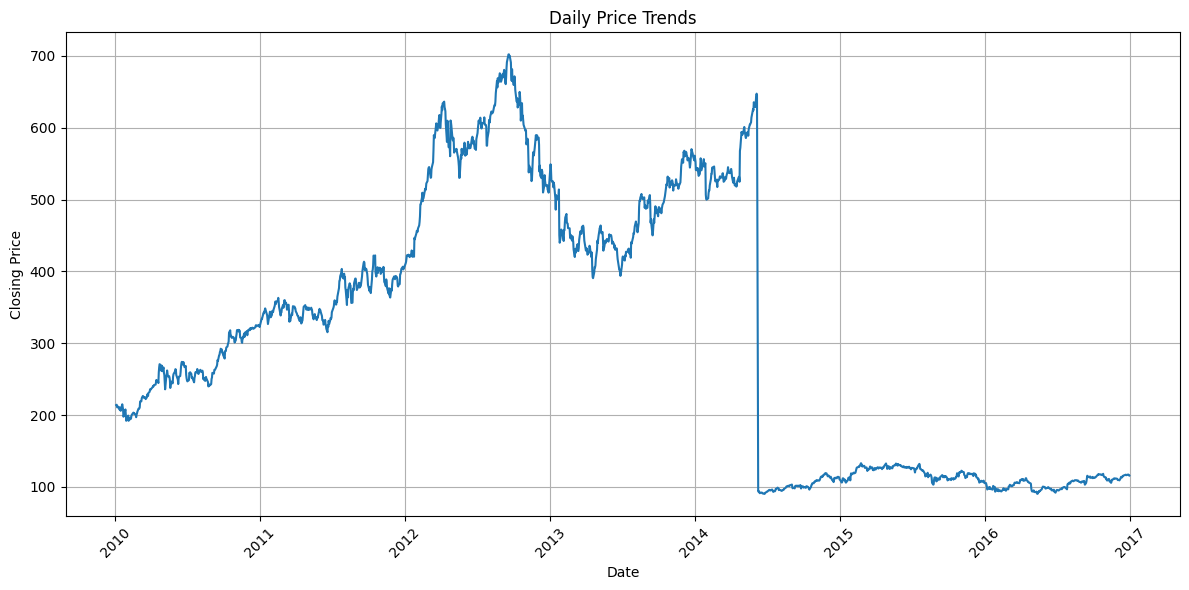

In [ ]:
# prompt: Plot the daily price trends.

import matplotlib.pyplot as plt

# Extract the 'Date' and 'Close' columns as Pandas Series
date_series = df.select("Date").toPandas()["Date"]
close_series = df.select("Close").toPandas()["Close"]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(date_series, close_series)
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Daily Price Trends")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


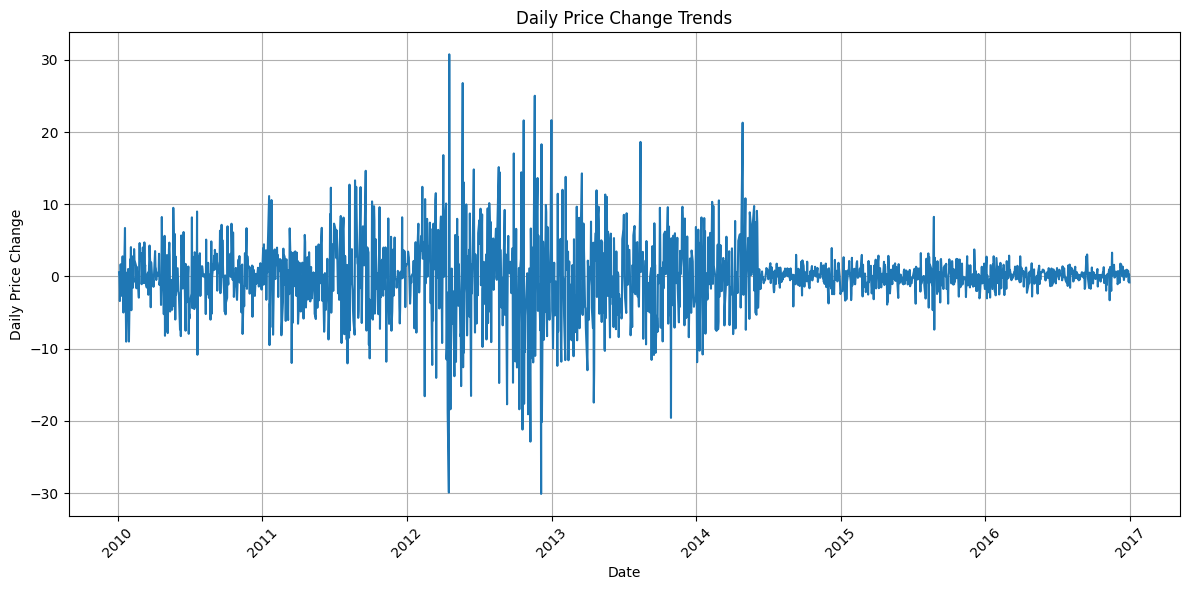

In [ ]:
# prompt: Plot the daily price change trends.

# Extract the 'Date' and 'DailyChange' columns as Pandas Series
date_series = daily_change_df.select("Date").toPandas()["Date"]
daily_change_series = daily_change_df.select("DailyChange").toPandas()["DailyChange"]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(date_series, daily_change_series)
plt.xlabel("Date")
plt.ylabel("Daily Price Change")
plt.title("Daily Price Change Trends")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# prompt: Import SparkSession, functions , IntegerType, DoubleType, matplotlib, seaborn and logging.

from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType, DoubleType
import matplotlib.pyplot as plt
import seaborn as sns
import logging


In [ ]:
# prompt: Load CSV File (/content/ID_31_data.csv) Using PySpark

df_ID_31 = spark.read.csv('/content/ID_31_data.csv', header=True, inferSchema=True)
df_ID_31.show()


+-------------------+---------+----------+------------------+-------+--------+---+----+--------+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|      ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|         date_ti

In [ ]:
# prompt: Ensure 'speed' is of type Double and 'ID' is Integer

from pyspark.sql.functions import col
from pyspark.sql.types import IntegerType, DoubleType

df_ID_31 = df_ID_31.withColumn("speed", col("speed").cast(DoubleType())) \
                  .withColumn("ID", col("ID").cast(IntegerType()))

df_ID_31.printSchema()


root
 |-- capturedtimestamp: timestamp (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- speed: double (nullable = true)
 |-- geohash: string (nullable = true)
 |-- month: double (nullable = true)
 |-- day: integer (nullable = true)
 |-- hour: integer (nullable = true)
 |-- ID: integer (nullable = true)
 |-- Custom_ID_left: string (nullable = true)
 |-- index_right: integer (nullable = true)
 |-- Custom_ID_right: string (nullable = true)
 |-- FIRST_ROUT_1: string (nullable = true)
 |-- FIRST_ROAD_1: integer (nullable = true)
 |-- FIRST_MEDI_1: integer (nullable = true)
 |-- FIRST_AADT_1: integer (nullable = true)
 |-- FIRST_NUMB_1: integer (nullable = true)
 |-- MEAN_AADT_1: double (nullable = true)
 |-- MEAN_EXPAN_1: double (nullable = true)
 |-- MEAN_PERCE_1: double (nullable = true)
 |-- MEAN_MEDIA_1: double (nullable = true)
 |-- MEAN_SURFA_1: double (nullable = true)
 |-- BUFF_DIST_1: double (nullable = true)
 |-- ORIG_FID_1: i

In [ ]:
# prompt: Convert timestamp to Spark timestamp type

from pyspark.sql.functions import to_timestamp

# Assuming your timestamp column is named 'timestamp_column'
df_ID_31 = df_ID_31.withColumn("timestamp", to_timestamp("timestamp_column", "your_timestamp_format"))

# Example:
# If your timestamp column is formatted as 'yyyy-MM-dd HH:mm:ss'
# df_ID_31 = df_ID_31.withColumn("timestamp", to_timestamp("timestamp_column", "yyyy-MM-dd HH:mm:ss"))

df_ID_31.show()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `timestamp_column` cannot be resolved. Did you mean one of the following? [`Custom_ID`, `Custom_ID_left`, `Direction`, `time29`, `Custom_ID_right`].;
'Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 29 more fields]
+- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, cast(ID#928 as int) AS ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
   +- Project [capturedtimestamp#920, latitude#921, longitude#922, cast(speed#923 as double) AS speed#1286, geohash#924, month#925, day#926, hour#927, ID#928, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
      +- Relation [capturedtimestamp#920,latitude#921,longitude#922,speed#923,geohash#924,month#925,day#926,hour#927,ID#928,Custom_ID_left#929,index_right#930,Custom_ID_right#931,FIRST_ROUT_1#932,FIRST_ROAD_1#933,FIRST_MEDI_1#934,FIRST_AADT_1#935,FIRST_NUMB_1#936,MEAN_AADT_1#937,MEAN_EXPAN_1#938,MEAN_PERCE_1#939,MEAN_MEDIA_1#940,MEAN_SURFA_1#941,BUFF_DIST_1#942,ORIG_FID_1#943,... 28 more fields] csv


In [ ]:
# prompt: Convert timestamp to Spark timestamp type

from pyspark.sql.functions import to_timestamp

# Assuming your timestamp column is named 'capturedtimestamp'
df_ID_31 = df_ID_31.withColumn("timestamp", to_timestamp("capturedtimestamp"))

# Example:
# If your timestamp column is formatted as 'yyyy-MM-dd HH:mm:ss'
# df_ID_31 = df_ID_31.withColumn("timestamp", to_timestamp("capturedtimestamp", "yyyy-MM-dd HH:mm:ss"))

df_ID_31.show()

+-------------------+---------+----------+------------------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+-------------------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             Time26|    

In [ ]:
# prompt: Extract hour and day of the week for further analysis

from pyspark.sql.functions import hour, dayofweek

# Extract hour and day of week from the timestamp column
df_ID_31 = df_ID_31.withColumn("hour", hour("timestamp")) \
                  .withColumn("dayofweek", dayofweek("timestamp"))

df_ID_31.show()


+-------------------+---------+----------+------------------+-------+--------+---+----+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+-------------------+---------+
|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|  ID|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN_AADT_1|MEAN_EXPAN_1|MEAN_PERCE_1|MEAN_MEDIA_1| MEAN_SURFA_1|BUFF_DIST_1|ORIG_FID_1|freq|      date|             T

In [ ]:
# prompt: compute the required statistics using PySpark functions (fraction_5_over_limit ,fraction_10_over_limit , 100 fraction_20_over_limit)

from pyspark.sql.functions import when, count, sum

# Calculate the required statistics
df_stats = df_ID_31.agg(
    (sum(when(df_ID_31.speed > 5, 1)).alias('fraction_5_over_limit')) / count('*'),
    (sum(when(df_ID_31.speed > 10, 1)).alias('fraction_10_over_limit')) / count('*'),
    (sum(when(df_ID_31.speed > 20, 1)).alias('fraction_20_over_limit')) / count('*') * 100
)

df_stats.show()


+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|(sum(CASE WHEN (speed > 5) THEN 1 END) AS fraction_5_over_limit / count(1))|(sum(CASE WHEN (speed > 10) THEN 1 END) AS fraction_10_over_limit / count(1))|((sum(CASE WHEN (speed > 20) THEN 1 END) AS fraction_20_over_limit / count(1)) * 100)|
+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|                                                         0.9795130536814315|                                                           0.9707128190085069|                                                                    94.81959518920505|
+-------------------------------

In [ ]:
# prompt: Log the statistics

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Log the statistics
logger.info("Statistics for ID 31:")
df_stats.show()


NameError: name 'logging' is not defined

In [ ]:
# prompt: Log the statistics

# Import the logging module
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Log the statistics
logger.info("Statistics for ID 31:")
df_stats.show()

+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|(sum(CASE WHEN (speed > 5) THEN 1 END) AS fraction_5_over_limit / count(1))|(sum(CASE WHEN (speed > 10) THEN 1 END) AS fraction_10_over_limit / count(1))|((sum(CASE WHEN (speed > 20) THEN 1 END) AS fraction_20_over_limit / count(1)) * 100)|
+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|                                                         0.9795130536814315|                                                           0.9707128190085069|                                                                    94.81959518920505|
+-------------------------------

In [ ]:
# prompt: Calculate 50th percentile (median) speed per journey and fractions over limits

from pyspark.sql.functions import percentile_approx

# Group by journey and calculate the median speed
median_speed_df = df_ID_31.groupBy("journey").agg(
    percentile_approx("speed", 0.5).alias("median_speed")
)

# Join with the original DataFrame to get the median speed for each row
df_with_median = df_ID_31.join(median_speed_df, on="journey", how="left")

# Calculate fractions over limits using the median speed
df_with_fractions = df_with_median.withColumn(
    "fraction_5_over_median", when(col("speed") > col("median_speed") * 1.05, 1).otherwise(0)
).withColumn(
    "fraction_10_over_median", when(col("speed") > col("median_speed") * 1.10, 1).otherwise(0)
).withColumn(
    "fraction_20_over_median", when(col("speed") > col("median_speed") * 1.20, 1).otherwise(0)
)


# Calculate the overall fractions over limits per journey
journey_stats = df_with_fractions.groupBy("journey").agg(
    (sum("fraction_5_over_median") / count("*")).alias("fraction_5_over_median"),
    (sum("fraction_10_over_median") / count("*")).alias("fraction_10_over_median"),
    (sum("fraction_20_over_median") / count("*")).alias("fraction_20_over_median")
)

journey_stats.show()


AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `journey` cannot be resolved. Did you mean one of the following? [`hour`, `date`, `freq`, `ID`, `Leg`].;
'Aggregate ['journey], ['journey, percentile_approx(speed#1286, 0.5, 10000, 0, 0) AS median_speed#2270]
+- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#1712, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 30 more fields]
   +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour(timestamp#1393, Some(Etc/UTC)) AS hour#1712, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 29 more fields]
      +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 29 more fields]
         +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, cast(ID#928 as int) AS ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
            +- Project [capturedtimestamp#920, latitude#921, longitude#922, cast(speed#923 as double) AS speed#1286, geohash#924, month#925, day#926, hour#927, ID#928, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
               +- Relation [capturedtimestamp#920,latitude#921,longitude#922,speed#923,geohash#924,month#925,day#926,hour#927,ID#928,Custom_ID_left#929,index_right#930,Custom_ID_right#931,FIRST_ROUT_1#932,FIRST_ROAD_1#933,FIRST_MEDI_1#934,FIRST_AADT_1#935,FIRST_NUMB_1#936,MEAN_AADT_1#937,MEAN_EXPAN_1#938,MEAN_PERCE_1#939,MEAN_MEDIA_1#940,MEAN_SURFA_1#941,BUFF_DIST_1#942,ORIG_FID_1#943,... 28 more fields] csv


In [ ]:
# prompt: Calculate 50th percentile (median) speed per journey and fractions over limits

from pyspark.sql.functions import percentile_approx, col, when, count, sum

# Assuming 'ID' represents the journey, replace 'journey' with 'ID'
median_speed_df = df_ID_31.groupBy("ID").agg(
    percentile_approx("speed", 0.5).alias("median_speed")
)

# Join with the original DataFrame to get the median speed for each row
df_with_median = df_ID_31.join(median_speed_df, on="ID", how="left")

# Calculate fractions over limits using the median speed
df_with_fractions = df_with_median.withColumn(
    "fraction_5_over_median", when(col("speed") > col("median_speed") * 1.05, 1).otherwise(0)
).withColumn(
    "fraction_10_over_median", when(col("speed") > col("median_speed") * 1.10, 1).otherwise(0)
).withColumn(
    "fraction_20_over_median", when(col("speed") > col("median_speed") * 1.20, 1).otherwise(0)
)


# Calculate the overall fractions over limits per journey
journey_stats = df_with_fractions.groupBy("ID").agg(
    (sum("fraction_5_over_median") / count("*")).alias("fraction_5_over_median"),
    (sum("fraction_10_over_median") / count("*")).alias("fraction_10_over_median"),
    (sum("fraction_20_over_median") / count("*")).alias("fraction_20_over_median")
)

journey_stats.show()

+----+----------------------+-----------------------+-----------------------+
|  ID|fraction_5_over_median|fraction_10_over_median|fraction_20_over_median|
+----+----------------------+-----------------------+-----------------------+
|NULL|                   0.0|                    0.0|                    0.0|
+----+----------------------+-----------------------+-----------------------+



In [ ]:
# prompt: Print all statistics

# Calculate the required statistics
df_stats = df_ID_31.agg(
    (sum(when(df_ID_31.speed > 5, 1)).alias('fraction_5_over_limit')) / count('*'),
    (sum(when(df_ID_31.speed > 10, 1)).alias('fraction_10_over_limit')) / count('*'),
    (sum(when(df_ID_31.speed > 20, 1)).alias('fraction_20_over_limit')) / count('*') * 100
)

# Print the statistics
df_stats.show()

# Calculate the median speed for each journey
median_speed_df = df_ID_31.groupBy("journey").agg(
    percentile_approx("speed", 0.5).alias("median_speed")
)
# Print the median speed
median_speed_df.show()

# Join with the original DataFrame to get the median speed for each row
df_with_median = df_ID_31.join(median_speed_df, on="journey", how="left")
# Print the DataFrame with median speed
df_with_median.show()

# Calculate fractions over limits using the median speed
df_with_fractions = df_with_median.withColumn(
    "fraction_5_over_median", when(col("speed") > col("median_speed") * 1.05, 1).otherwise(0)
).withColumn(
    "fraction_10_over_median", when(col("speed") > col("median_speed") * 1.10, 1).otherwise(0)
).withColumn(
    "fraction_20_over_median", when(col("speed") > col("median_speed") * 1.20, 1).otherwise(0)
)
# Print the DataFrame with fractions
df_with_fractions.show()

# Calculate the overall fractions over limits per journey
journey_stats = df_with_fractions.groupBy("journey").agg(
    (sum("fraction_5_over_median") / count("*")).alias("fraction_5_over_median"),
    (sum("fraction_10_over_median") / count("*")).alias("fraction_10_over_median"),
    (sum("fraction_20_over_median") / count("*")).alias("fraction_20_over_median")
)
# Print the journey statistics
journey_stats.show()


+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|(sum(CASE WHEN (speed > 5) THEN 1 END) AS fraction_5_over_limit / count(1))|(sum(CASE WHEN (speed > 10) THEN 1 END) AS fraction_10_over_limit / count(1))|((sum(CASE WHEN (speed > 20) THEN 1 END) AS fraction_20_over_limit / count(1)) * 100)|
+---------------------------------------------------------------------------+-----------------------------------------------------------------------------+-------------------------------------------------------------------------------------+
|                                                         0.9795130536814315|                                                           0.9707128190085069|                                                                    94.81959518920505|
+-------------------------------

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `journey` cannot be resolved. Did you mean one of the following? [`hour`, `date`, `freq`, `ID`, `Leg`].;
'Aggregate ['journey], ['journey, percentile_approx(speed#1286, 0.5, 10000, 0, 0) AS median_speed#2879]
+- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#1712, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 30 more fields]
   +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour(timestamp#1393, Some(Etc/UTC)) AS hour#1712, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 29 more fields]
      +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 29 more fields]
         +- Project [capturedtimestamp#920, latitude#921, longitude#922, speed#1286, geohash#924, month#925, day#926, hour#927, cast(ID#928 as int) AS ID#1339, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
            +- Project [capturedtimestamp#920, latitude#921, longitude#922, cast(speed#923 as double) AS speed#1286, geohash#924, month#925, day#926, hour#927, ID#928, Custom_ID_left#929, index_right#930, Custom_ID_right#931, FIRST_ROUT_1#932, FIRST_ROAD_1#933, FIRST_MEDI_1#934, FIRST_AADT_1#935, FIRST_NUMB_1#936, MEAN_AADT_1#937, MEAN_EXPAN_1#938, MEAN_PERCE_1#939, MEAN_MEDIA_1#940, MEAN_SURFA_1#941, BUFF_DIST_1#942, ORIG_FID_1#943, ... 28 more fields]
               +- Relation [capturedtimestamp#920,latitude#921,longitude#922,speed#923,geohash#924,month#925,day#926,hour#927,ID#928,Custom_ID_left#929,index_right#930,Custom_ID_right#931,FIRST_ROUT_1#932,FIRST_ROAD_1#933,FIRST_MEDI_1#934,FIRST_AADT_1#935,FIRST_NUMB_1#936,MEAN_AADT_1#937,MEAN_EXPAN_1#938,MEAN_PERCE_1#939,MEAN_MEDIA_1#940,MEAN_SURFA_1#941,BUFF_DIST_1#942,ORIG_FID_1#943,... 28 more fields] csv


In [ ]:
# Calculate the median speed for each journey
median_speed_df = df_ID_31.groupBy("ID").agg( # Changed 'journey' to 'ID'
    percentile_approx("speed", 0.5).alias("median_speed")
)
# Print the median speed
median_speed_df.show()

# Join with the original DataFrame to get the median speed for each row
df_with_median = df_ID_31.join(median_speed_df, on="ID", how="left") # Changed 'journey' to 'ID'
# Print the DataFrame with median speed
df_with_median.show()

# Calculate fractions over limits using the median speed
df_with_fractions = df_with_median.withColumn(
    "fraction_5_over_median", when(col("speed") > col("median_speed") * 1.05, 1).otherwise(0)
).withColumn(
    "fraction_10_over_median", when(col("speed") > col("median_speed") * 1.10, 1).otherwise(0)
).withColumn(
    "fraction_20_over_median", when(col("speed") > col("median_speed") * 1.20, 1).otherwise(0)
)
# Print the DataFrame with fractions
df_with_fractions.show()

# Calculate the overall fractions over limits per journey
journey_stats = df_with_fractions.groupBy("ID").agg( # Changed 'journey' to 'ID'
    (sum("fraction_5_over_median") / count("*")).alias("fraction_5_over_median"),
    (sum("fraction_10_over_median") / count("*")).alias("fraction_10_over_median"),
    (sum("fraction_20_over_median") / count("*")).alias("fraction_20_over_median")
)
# Print the journey statistics
journey_stats.show()

+----+------------+
|  ID|median_speed|
+----+------------+
|NULL|   56.544761|
+----+------------+

+----+-------------------+---------+----------+------------------+-------+--------+---+----+--------------+-----------+---------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+-----------+----------+----+----------+-------------------+-------------------+-------------------+-------+-------+-------+-----------+----------+---------+------------+------------+------------+------------+------------+------------+------------+------------+------------+-------------+---------------+-----------+----------+---------+--------------------+--------+-----------------+-------------------+---------+------------+
|  ID|  capturedtimestamp| latitude| longitude|             speed|geohash|   month|day|hour|Custom_ID_left|index_right|Custom_ID_right|FIRST_ROUT_1|FIRST_ROAD_1|FIRST_MEDI_1|FIRST_AADT_1|FIRST_NUMB_1| MEAN

In [ ]:
# prompt: Convert to Pandas DataFrame for plotting

# Convert the PySpark DataFrame to a Pandas DataFrame
pandas_df = journey_stats.toPandas()

# Now you can use pandas_df for plotting with matplotlib or seaborn


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


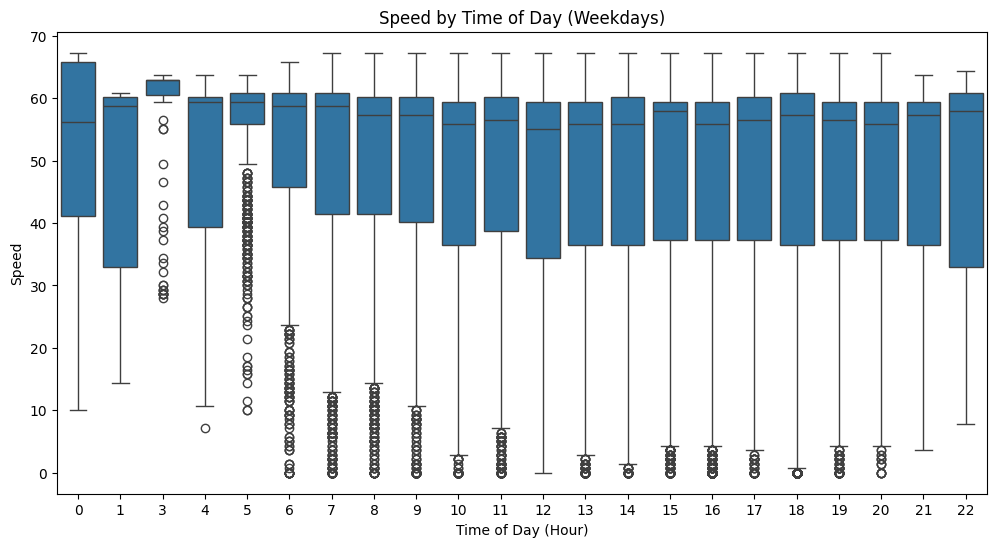

In [ ]:
# prompt: Use Boxplots to plot Speed by Time of Day (Weekdays)

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_ID_31' is your DataFrame with speed and timestamp information
# and it has 'hour' and 'dayofweek' columns extracted from timestamp.

# Filter for weekdays (Monday to Friday, dayofweek 2-6)
weekday_df = df_ID_31.filter((df_ID_31.dayofweek >= 2) & (df_ID_31.dayofweek <= 6))

# Convert to Pandas DataFrame
pandas_df = weekday_df.toPandas()

# Create the boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Speed')
plt.title('Speed by Time of Day (Weekdays)')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


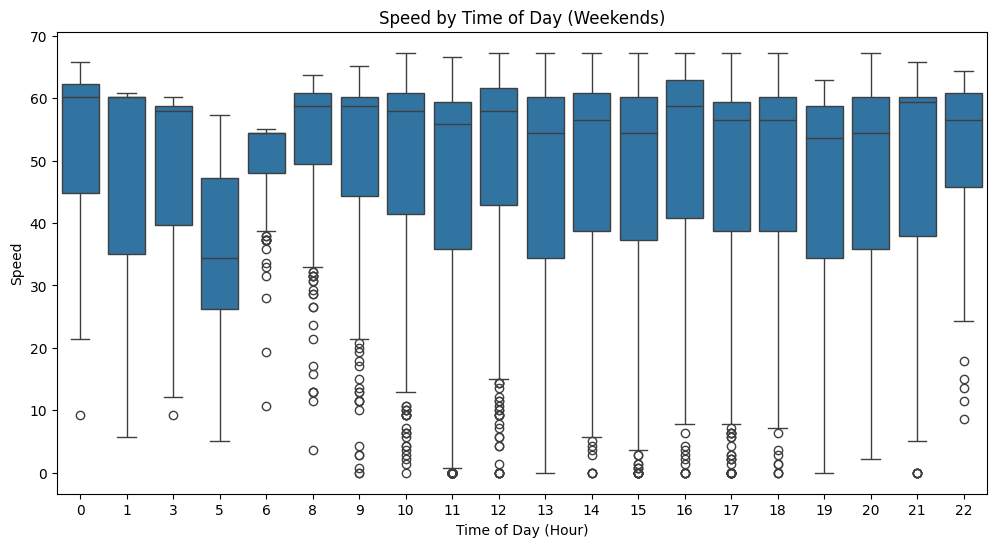

In [ ]:
# prompt: Use Boxplots to plot Speed by Time of Day (Weekends)

# Assuming 'df_ID_31' is your DataFrame with speed and timestamp information
# and it has 'hour' and 'dayofweek' columns extracted from timestamp.

# Filter for weekends (Saturday and Sunday, dayofweek 1 or 7)
weekend_df = df_ID_31.filter((df_ID_31.dayofweek == 1) | (df_ID_31.dayofweek == 7))

# Convert to Pandas DataFrame
pandas_df = weekend_df.toPandas()

# Create the boxplot using Seaborn
plt.figure(figsize=(12, 6))
sns.boxplot(x='hour', y='speed', data=pandas_df)
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Speed')
plt.title('Speed by Time of Day (Weekends)')
plt.show()


In [ ]:
# prompt: Upload wejo.json and load it into rdd

uploaded = files.upload()

# Assuming the uploaded file is named 'wejo.json'
rdd = spark.sparkContext.textFile('wejo.json')


Saving wejo.json to wejo (1).json


In [ ]:
# prompt: Inspect first few rows

rdd.take(5)


['{"dataPointId":"02d77c7e-1ac8-45bc-978f-7c3855f5ff9b","journeyId":"2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc","capturedTimestamp":"2023-04-12T19:00:04.000-0500","location":{"latitude":42.497317,"longitude":-90.740595,"geohash":"9zx3z0","postalCode":"52002","regionCode":"IA","countryCode":"US"},"metrics":{"speed":38.01,"heading":359.0},"vehicle":{"wejoVehicleTypeId":8905611058720503136,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"03fde858-5922-446a-b68a-00167b866c6e","journeyId":"1183a6bfb3178ba00a4a8585aca72db2d4e689ad","capturedTimestamp":"2023-04-12T19:00:21.000-0500","location":{"latitude":41.658504,"longitude":-93.500216,"geohash":"9zmsbr","postalCode":"50009","regionCode":"IA","countryCode":"US"},"metrics":{"speed":41.47,"heading":90.0},"vehicle":{"wejoVehicleTypeId":-5486746399762838414,"status":{"ignitionStatus":"MID_JOURNEY"}}}',
 '{"dataPointId":"04ce2a2c-d0fd-4197-9416-9324c9a5106c","journeyId":"1c96529d9ccf86042ca98744b3f3b710c247b67d","capturedTimestamp"

In [ ]:
# prompt: Parse JSON Strings into Python Dictionaries

import json

def parse_json(line):
  try:
    return json.loads(line)
  except json.JSONDecodeError as e:
    print(f"Error parsing JSON: {e}")
    return None

parsed_rdd = rdd.map(parse_json)
parsed_rdd.take(5)


[{'dataPointId': '02d77c7e-1ac8-45bc-978f-7c3855f5ff9b',
  'journeyId': '2fe4fae05dd1198d1995d8f9e34d69a5ca1cc8bc',
  'capturedTimestamp': '2023-04-12T19:00:04.000-0500',
  'location': {'latitude': 42.497317,
   'longitude': -90.740595,
   'geohash': '9zx3z0',
   'postalCode': '52002',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 38.01, 'heading': 359.0},
  'vehicle': {'wejoVehicleTypeId': 8905611058720503136,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '03fde858-5922-446a-b68a-00167b866c6e',
  'journeyId': '1183a6bfb3178ba00a4a8585aca72db2d4e689ad',
  'capturedTimestamp': '2023-04-12T19:00:21.000-0500',
  'location': {'latitude': 41.658504,
   'longitude': -93.500216,
   'geohash': '9zmsbr',
   'postalCode': '50009',
   'regionCode': 'IA',
   'countryCode': 'US'},
  'metrics': {'speed': 41.47, 'heading': 90.0},
  'vehicle': {'wejoVehicleTypeId': -5486746399762838414,
   'status': {'ignitionStatus': 'MID_JOURNEY'}}},
 {'dataPointId': '04

In [ ]:
# prompt: Extract Key Information (latitude, longitude, speed).

def extract_info(record):
  if record:
    return (record.get('latitude'), record.get('longitude'), record.get('speed'))
  else:
    return (None, None, None)

extracted_rdd = parsed_rdd.map(extract_info)
extracted_rdd.take(5)


[(None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None),
 (None, None, None)]

In [ ]:
# prompt: Filter Data Points with Speed > 30 mph

# Filter data points where speed is greater than 30 mph
filtered_rdd = extracted_rdd.filter(lambda x: x[2] is not None and x[2] > 30)

# Show the first 5 filtered data points
filtered_rdd.take(5)


[]

In [ ]:
# prompt: Count the Number of Data Points with Speed > 30 mph.

count_speed_over_30 = filtered_rdd.count()
print("Number of data points with speed > 30 mph:", count_speed_over_30)


Number of data points with speed > 30 mph: 0


In [ ]:
# prompt: Collect and Display Filtered Data Points.

filtered_data_points = filtered_rdd.collect()
print("Filtered Data Points (Latitude, Longitude, Speed):")
for point in filtered_data_points:
  print(point)


Filtered Data Points (Latitude, Longitude, Speed):


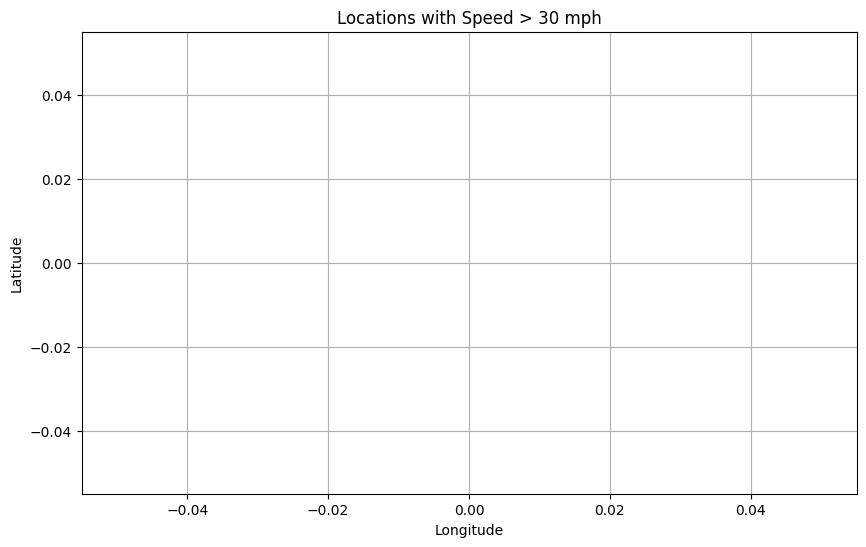

In [ ]:
# prompt: Plot the filtered data using matplotlib.

import matplotlib.pyplot as plt

# Assuming filtered_data_points is a list of tuples (latitude, longitude, speed)

latitudes = [point[0] for point in filtered_data_points if point[0] is not None]
longitudes = [point[1] for point in filtered_data_points if point[1] is not None]

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(longitudes, latitudes, marker='o', color='blue')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations with Speed > 30 mph')
plt.grid(True)
plt.show()
